/home/arsentii/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


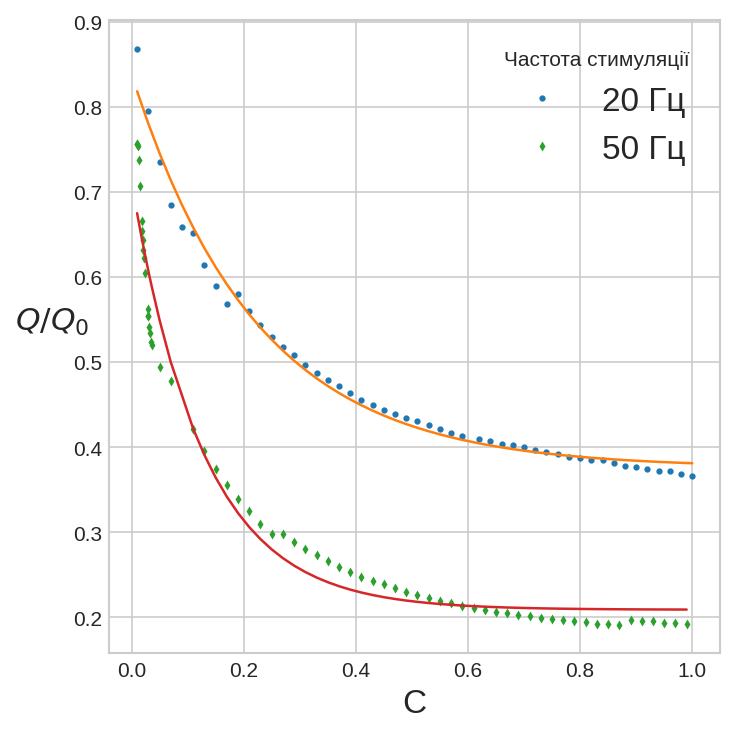

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline

plt.style.use('seaborn-whitegrid')


f_raw = pd.read_csv('results3.csv')
f = f_raw.sort_values(by = 'C')

f_raw2 = pd.read_csv('results3_3.csv')
f2 = f_raw2.sort_values(by = 'C')

def func(x, x0, a, b, c):
    return a*np.exp(-b*(x+x0)) + c

popt, _1 = curve_fit(func, f["C"], f["ratio"], maxfev=2000)
popt2, _2 = curve_fit(func, f2["C"], f2["ratio"], maxfev=2000)


plt.figure(dpi=150, figsize=(5, 5))

plt.plot(f["C"], f["ratio"], "o", label='20 Гц', markersize=2)
plt.plot(f["C"], func( f["C"], *popt), '-', lw=1.2)

plt.plot(f2["C"], f2["ratio"], "d", label='50 Гц', markersize=2)
plt.plot(f2["C"], func( f2["C"], *popt2), '-', lw=1.2)

plt.xlabel("С", fontsize=16)
plt.ylabel("$Q/Q_0$", fontsize=15, labelpad=10).set_rotation(0)
plt.legend(title="Частота стимуляції", fontsize=16) ;
plt.tight_layout()
#plt.savefig('../../Diplom/images/C_charge.png')
plt.show()